In [30]:
#Importar Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [31]:
#Importar el Dataset

dataset = np.load("/Users/diegoalvarez/Documents/Maestria/Python/Proyecto/proyecto_training_data.npy")

In [32]:
SP = dataset[:, 0]
OQ = dataset[:, 1]
FFSF = dataset[:, 2]
TRAG = dataset[:, 3]
YB = dataset[:, 4]
LF = dataset[:, 5]
print(SP)
print(OQ)
print(FFSF)
print(TRAG)
print(YB)
print(LF)

[208500. 181500. 223500. ... 266500. 142125. 147500.]
[7. 6. 7. ... 7. 5. 5.]
[ 856. 1262.  920. ... 1188. 1078. 1256.]
[8. 6. 6. ... 9. 5. 6.]
[2003. 1976. 2001. ... 1941. 1950. 1965.]
[65. 80. 68. ... 66. 68. 75.]


In [33]:
dframe = {'SP': (SP),
                 'OQ': (OQ),
                 'FFSF': (FFSF),
                 'TRAG': (TRAG),
                 'YB': (YB),
                 'LF': (LF)
            }
df = pd.DataFrame(dframe)
df     

,SP,OQ,FFSF,TRAG,YB,LF
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [34]:
#Revisión de datos NaN
porcentaje_nan_s = (df['SP'].isna().sum() / len(df['SP'])) * 100
porcentaje_nan_o = (df['OQ'].isna().sum() / len(df['OQ'])) * 100
porcentaje_nan_f = (df['FFSF'].isna().sum() / len(df['FFSF'])) * 100
porcentaje_nan_t = (df['TRAG'].isna().sum() / len(df['TRAG'])) * 100
porcentaje_nan_y = (df['YB'].isna().sum() / len(df['YB'])) * 100
porcentaje_nan_l = (df['LF'].isna().sum() / len(df['LF'])) * 100
print(f'El porcentaje de valores NaN en la variable SalePrice es: {porcentaje_nan_s:.2f}%')
print(f'El porcentaje de valores NaN en la variable OverallQual es: {porcentaje_nan_o:.2f}%')
print(f'El porcentaje de valores NaN en la variable FstFlrSF es: {porcentaje_nan_f:.2f}%')
print(f'El porcentaje de valores NaN en la variable TotRmsAbvGrd es: {porcentaje_nan_t:.2f}%')
print(f'El porcentaje de valores NaN en la variable YearBuilt es: {porcentaje_nan_y:.2f}%')
print(f'El porcentaje de valores NaN en la variable LotFrontage es: {porcentaje_nan_l:.2f}%')

El porcentaje de valores NaN en la variable SalePrice es: 0.00%
El porcentaje de valores NaN en la variable OverallQual es: 0.00%
El porcentaje de valores NaN en la variable FstFlrSF es: 0.00%
El porcentaje de valores NaN en la variable TotRmsAbvGrd es: 0.00%
El porcentaje de valores NaN en la variable YearBuilt es: 0.00%
El porcentaje de valores NaN en la variable LotFrontage es: 17.74%


LotFrontage: 
Media: 70.04995836802665 
Mediana: 69.0 
Máximo: 313.0 
Mínimo: 21.0



/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


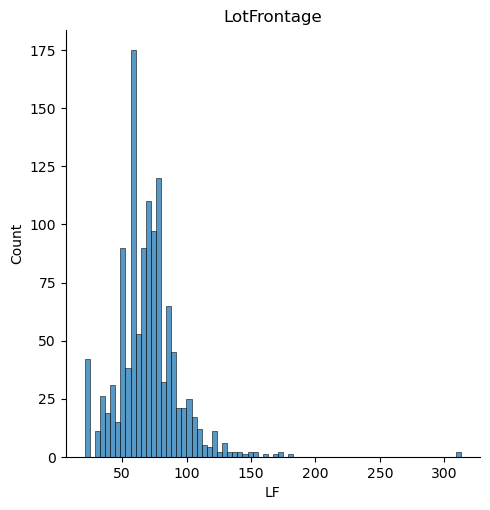

In [35]:
#Análisis de la varible con Nan

LFM = np.nanmean(LF)
LFMD = np.nanmedian(LF)
LFMX = np.nanmax(LF)
LFMN = np.nanmin(LF)
print('LotFrontage:','\n''Media:', LFM,'\n''Mediana:', LFMD, '\n''Máximo:', LFMX,'\n''Mínimo:', LFMN)
print()

gfs = sns.displot(df['LF'])
gfs.set(title='LotFrontage')
plt.show()

In [36]:
#Imputamos los datos NaN

dt_imputados = np.where(np.isnan(dataset), 69, dataset)
print(dt_imputados)

[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


In [64]:
df_ma = pd.DataFrame(dt_imputados, columns=['SalePrice', 'OverallQual', 'FstFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
df_ma

,SalePrice,OverallQual,FstFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [94]:
porcentaje_nan_si = (df_ma['SalePrice'].isna().sum() / len(df['SP'])) * 100
porcentaje_nan_oi = (df_ma['OverallQual'].isna().sum() / len(df['OQ'])) * 100
porcentaje_nan_fi = (df_ma['FstFlrSF'].isna().sum() / len(df['FFSF'])) * 100
porcentaje_nan_ti = (df_ma['TotRmsAbvGrd'].isna().sum() / len(df['TRAG'])) * 100
porcentaje_nan_yi = (df_ma['YearBuilt'].isna().sum() / len(df['YB'])) * 100
porcentaje_nan_li = (df_ma['LotFrontage'].isna().sum() / len(df['LF'])) * 100
print(f'El porcentaje de valores NaN en la variable SalePrice es: {porcentaje_nan_si:.2f}%')
print(f'El porcentaje de valores NaN en la variable OverallQual es: {porcentaje_nan_oi:.2f}%')
print(f'El porcentaje de valores NaN en la variable FstFlrSF es: {porcentaje_nan_fi:.2f}%')
print(f'El porcentaje de valores NaN en la variable TotRmsAbvGrd es: {porcentaje_nan_ti:.2f}%')
print(f'El porcentaje de valores NaN en la variable YearBuilt es: {porcentaje_nan_yi:.2f}%')
print(f'El porcentaje de valores NaN en la variable LotFrontage es: {porcentaje_nan_li:.2f}%')

El porcentaje de valores NaN en la variable SalePrice es: 0.00%
El porcentaje de valores NaN en la variable OverallQual es: 0.00%
El porcentaje de valores NaN en la variable FstFlrSF es: 0.00%
El porcentaje de valores NaN en la variable TotRmsAbvGrd es: 0.00%
El porcentaje de valores NaN en la variable YearBuilt es: 0.00%
El porcentaje de valores NaN en la variable LotFrontage es: 0.00%


In [55]:
print("Dividiendo datos en entrenamiento y validación...")
data_entre, data_val = train_test_split(dt_imputados, test_size=0.2, random_state=42)

Dividiendo datos en entrenamiento y validación...


In [57]:
print("Dimensiones del conjunto de entrenamiento:", data_entre.shape)
print("Dimensiones del conjunto de validación/pruebas:", data_val.shape)

Dimensiones del conjunto de entrenamiento: (1168, 6)
Dimensiones del conjunto de validación/pruebas: (292, 6)


In [69]:
#Exploración de variables
def calcular_estadisticas(df, columnas):
    estadisticas = {}
    for columna in columnas:
        estadisticas[columna] = {
            'media': df[columna].mean(),
            'maximo': df[columna].max(),
            'minimo': df[columna].min(),
            'rango': df[columna].max() - df[columna].min(),
            'desviacion_estandar': df[columna].std()
        }
    return estadisticas

columnas_a_calcular = ["SalePrice", "OverallQual", "FstFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]

estadisticas = calcular_estadisticas(df_ma, columnas_a_calcular)

for columna, valores in estadisticas.items():
    print(f"Estadísticas para '{columna}':")
    print(f"  Media: {valores['media']}")
    print(f"  Máximo: {valores['maximo']}")
    print(f"  Mínimo: {valores['minimo']}")
    print(f"  Rango: {valores['rango']}")
    print(f"  Desviación estándar: {valores['desviacion_estandar']}")
    print()

Estadísticas para 'SalePrice':
  Media: 180921.19589041095
  Máximo: 755000.0
  Mínimo: 34900.0
  Rango: 720100.0
  Desviación estándar: 79442.50288288663

Estadísticas para 'OverallQual':
  Media: 6.0993150684931505
  Máximo: 10.0
  Mínimo: 1.0
  Rango: 9.0
  Desviación estándar: 1.3829965467415923

Estadísticas para 'FstFlrSF':
  Media: 1162.626712328767
  Máximo: 4692.0
  Mínimo: 334.0
  Rango: 4358.0
  Desviación estándar: 386.5877380410738

Estadísticas para 'TotRmsAbvGrd':
  Media: 6.517808219178082
  Máximo: 14.0
  Mínimo: 2.0
  Rango: 12.0
  Desviación estándar: 1.625393290584064

Estadísticas para 'YearBuilt':
  Media: 1971.267808219178
  Máximo: 2010.0
  Mínimo: 1872.0
  Rango: 138.0
  Desviación estándar: 30.202904042525265

Estadísticas para 'LotFrontage':
  Media: 69.86369863013698
  Máximo: 313.0
  Mínimo: 21.0
  Rango: 292.0
  Desviación estándar: 22.027677088952412



/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


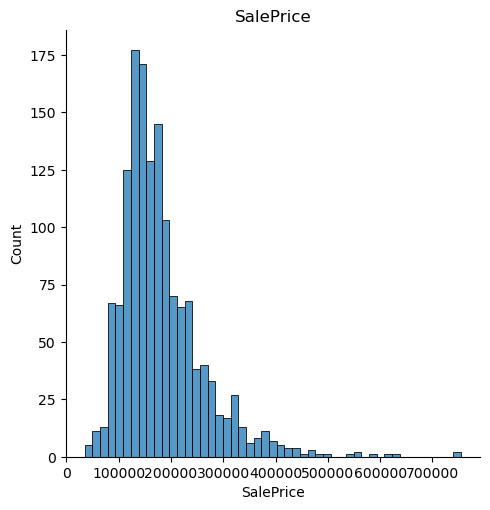

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


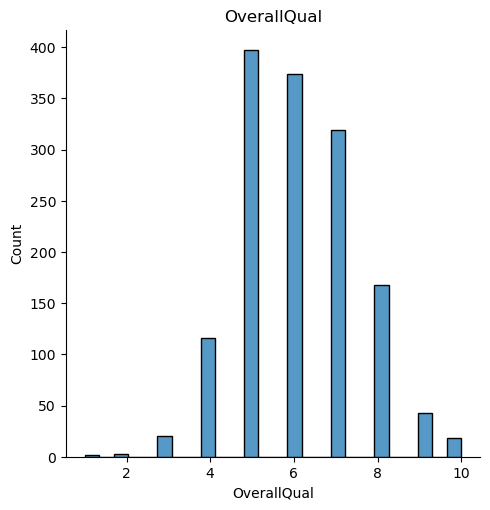

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


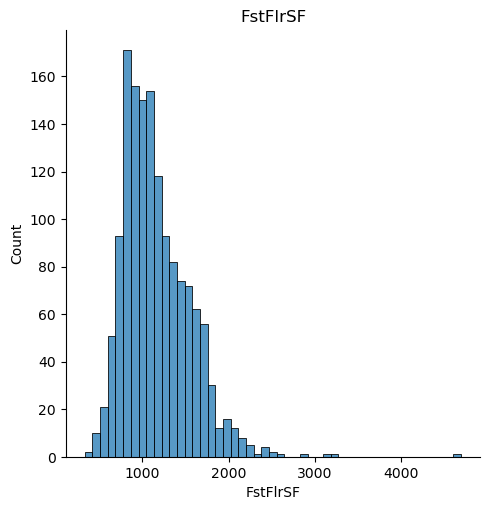

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


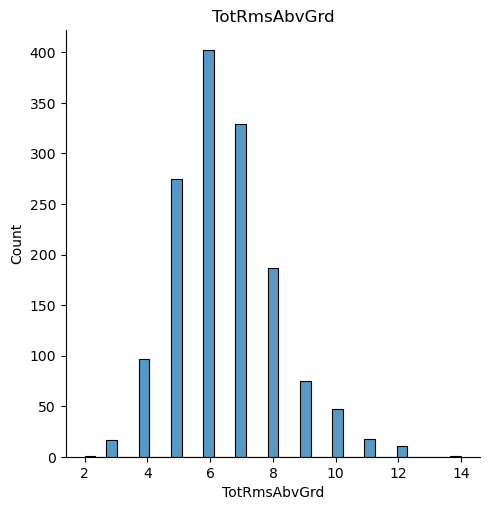

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


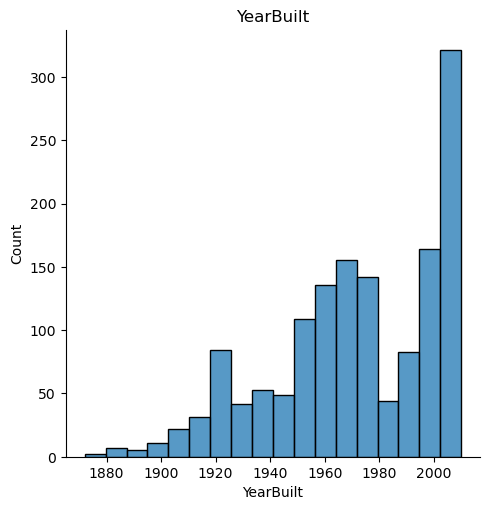

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


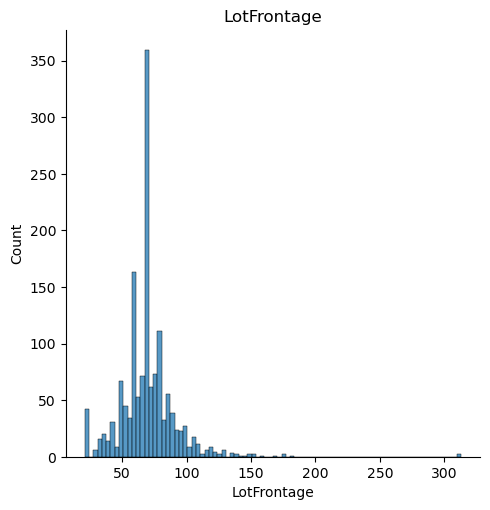

In [70]:
#Histogramas de Variables

gfs = sns.displot(df_ma['SalePrice'])
gfs.set(title='SalePrice')
plt.show()
print()
gfo = sns.displot(df_ma['OverallQual'])
gfo.set(title='OverallQual')
plt.show()
print()
gff = sns.displot(df_ma['FstFlrSF'])
gff.set(title='FstFlrSF')
plt.show()
print()
gft = sns.displot(df_ma['TotRmsAbvGrd'])
gft.set(title='TotRmsAbvGrd')
plt.show()
print()
gfy = sns.displot(df_ma['YearBuilt'])
gfy.set(title='YearBuilt')
plt.show()
print()
gfs = sns.displot(df_ma['LotFrontage'])
gfs.set(title='LotFrontage')
plt.show()

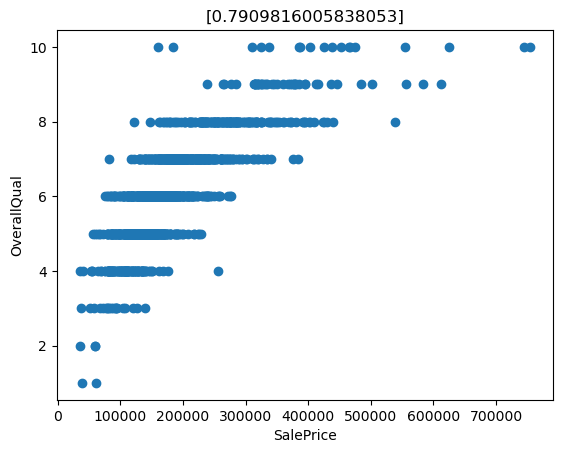

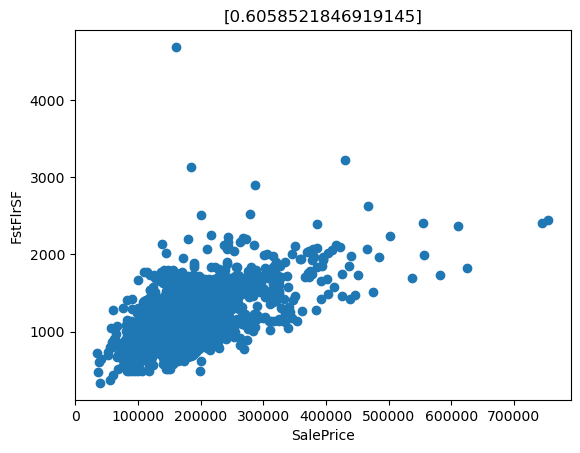

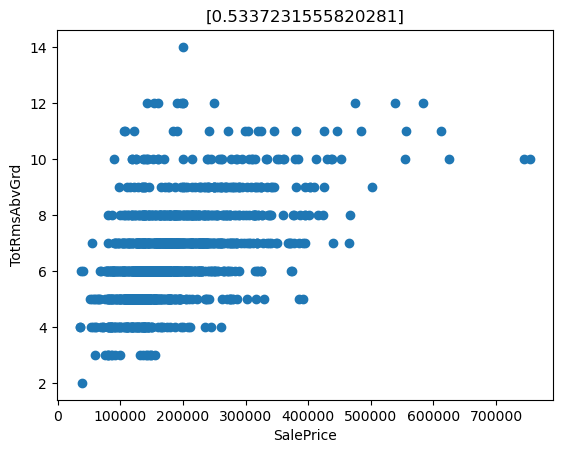

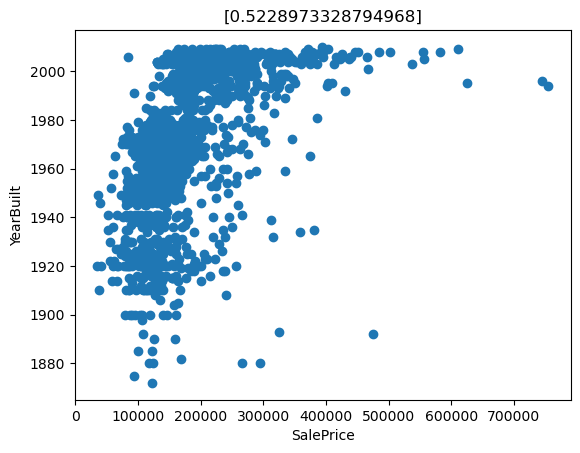

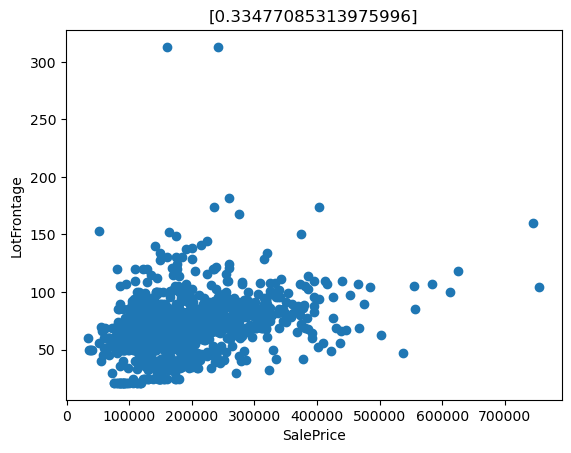

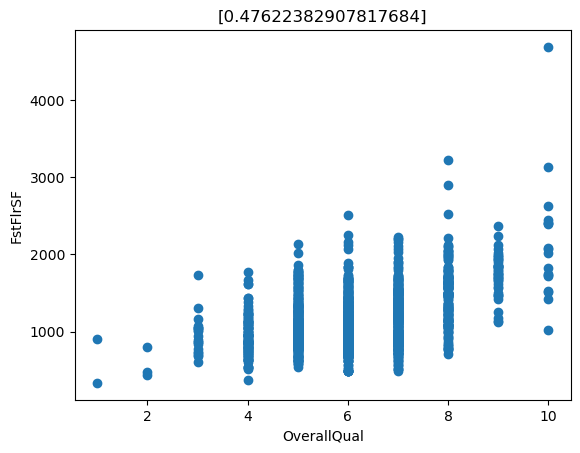

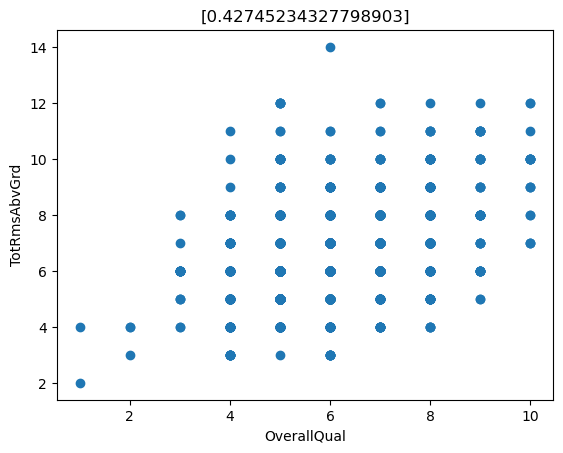

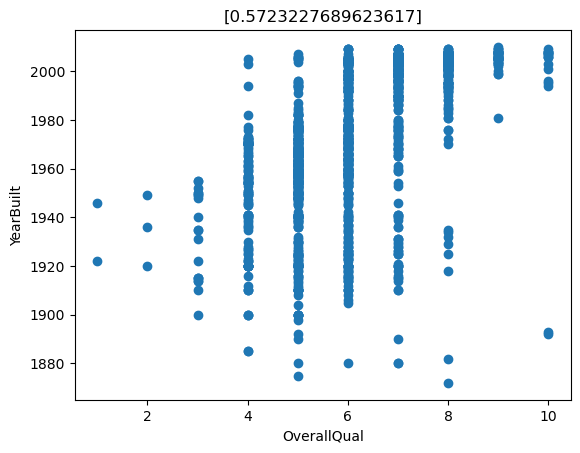

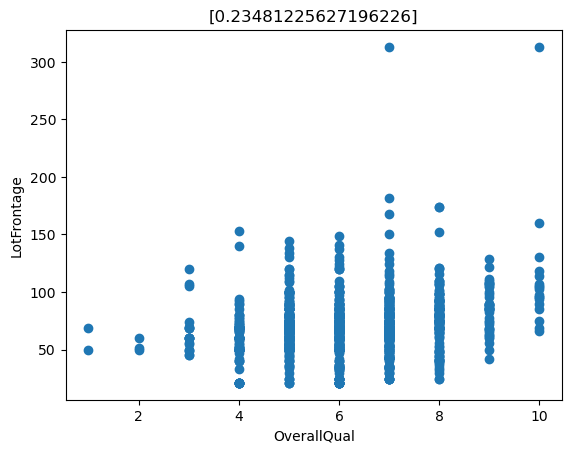

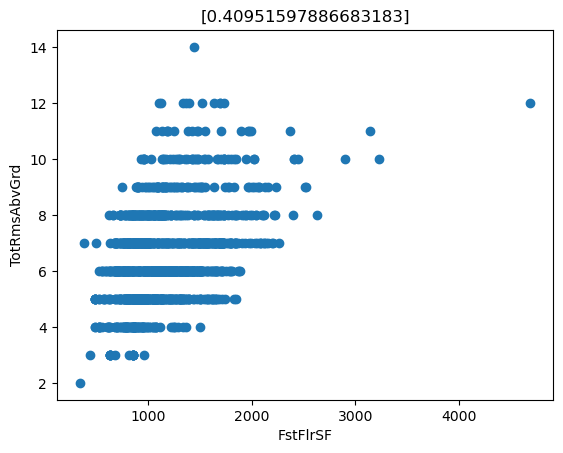

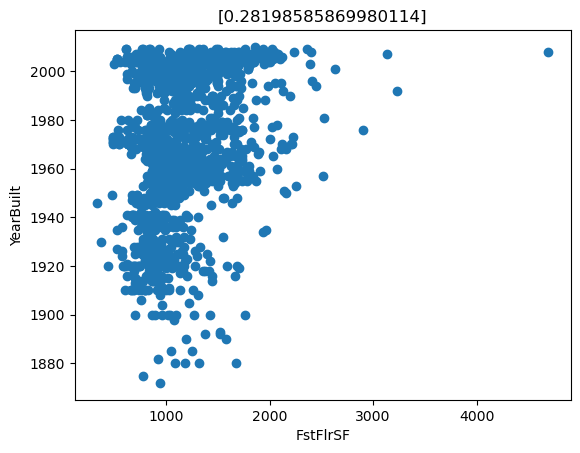

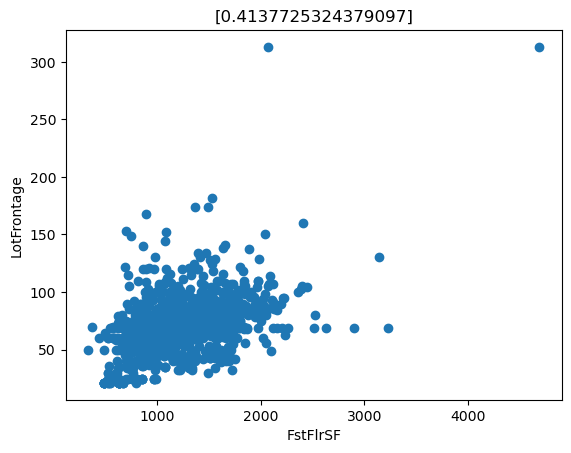

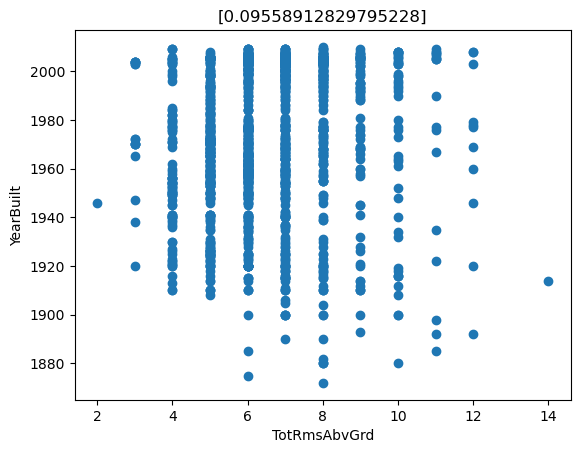

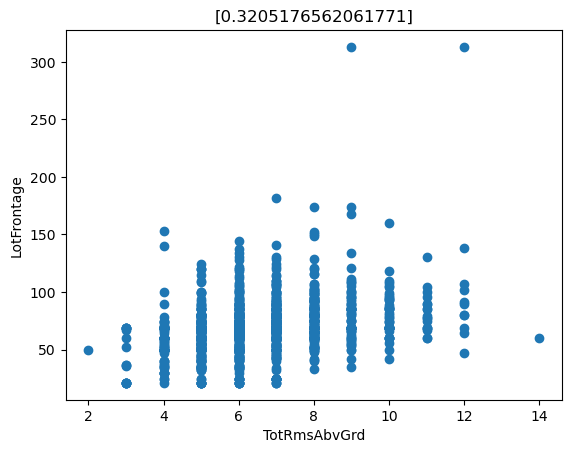

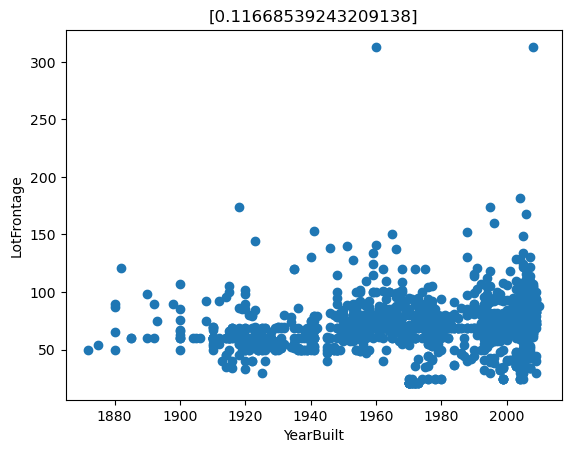

In [71]:
#Correlación

def tr_corr(x, y, x_label, y_label):
    cc = np.corrcoef(x, y)[0, 1]
    plt.scatter(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title([cc])
    plt.show()
    print()

#Correlación para Variables
tr_corr(df_ma['SalePrice'], df_ma['OverallQual'], 'SalePrice', 'OverallQual')
tr_corr(df_ma['SalePrice'], df_ma['FstFlrSF'], 'SalePrice', 'FstFlrSF')
tr_corr(df_ma['SalePrice'], df_ma['TotRmsAbvGrd'], 'SalePrice', 'TotRmsAbvGrd')
tr_corr(df_ma['SalePrice'], df_ma['YearBuilt'], 'SalePrice', 'YearBuilt')
tr_corr(df_ma['SalePrice'], df_ma['LotFrontage'], 'SalePrice', 'LotFrontage')
tr_corr(df_ma['OverallQual'], df_ma['FstFlrSF'], 'OverallQual', 'FstFlrSF')
tr_corr(df_ma['OverallQual'], df_ma['TotRmsAbvGrd'], 'OverallQual', 'TotRmsAbvGrd')
tr_corr(df_ma['OverallQual'], df_ma['YearBuilt'], 'OverallQual', 'YearBuilt')
tr_corr(df_ma['OverallQual'], df_ma['LotFrontage'], 'OverallQual', 'LotFrontage')
tr_corr(df_ma['FstFlrSF'], df_ma['TotRmsAbvGrd'], 'FstFlrSF', 'TotRmsAbvGrd')
tr_corr(df_ma['FstFlrSF'], df_ma['YearBuilt'], 'FstFlrSF', 'YearBuilt')
tr_corr(df_ma['FstFlrSF'], df_ma['LotFrontage'], 'FstFlrSF', 'LotFrontage')
tr_corr(df_ma['TotRmsAbvGrd'], df_ma['YearBuilt'], 'TotRmsAbvGrd', 'YearBuilt')
tr_corr(df_ma['TotRmsAbvGrd'], df_ma['LotFrontage'], 'TotRmsAbvGrd', 'LotFrontage')
tr_corr(df_ma['YearBuilt'], df_ma['LotFrontage'], 'YearBuilt', 'LotFrontage')

In [88]:
#Definición de Funciones
class LinearRegressionModel:
    def __init__(self):
        self.coefficients = None

    def train(self, x, y, epochs, print_error_each, alpha):
        X = np.column_stack((x, np.ones_like(x)))
        num_samples, num_features = X.shape
        self.coefficients = np.zeros(num_features)
        errors = []

        for epoch in range(epochs):
            y_pred = np.dot(X, self.coefficients)
            error = np.mean((y_pred - y) ** 2)
            errors.append(error)

            gradient = np.dot(X.T, y_pred - y) / num_samples
            self.coefficients -= alpha * gradient

            if (epoch + 1) % print_error_each == 0:
                print(f"Iteración {epoch + 1}: Error = {error}")

        return errors

    def predict(self, x):
        X = np.column_stack((x, np.ones_like(x)))
        return np.dot(X, self.coefficients)

In [113]:
#Función de entrenamiento manual de regresión lineal

def train_manual_model(x_train, y_train, x_val, y_val, epochs, print_error_each, alpha):
    model = LinearRegressionModel()
    errors = model.train(x_train, y_train, epochs=epochs, print_error_each=print_error_each, alpha=alpha)
    y_pred_manual = model.predict(x_val)
    return y_pred_manual

#Función de entrenamiento de scikit-learn de regreseión lineal

def train_sklearn_model(x_train, y_train, x_val):
    model = LinearRegression()
    model.fit(x_train.reshape(-1, 1), y_train)
    y_pred_sklearn = model.predict(x_val.reshape(-1, 1))
    return y_pred_sklearn

#Función para calcular predicciones combinadas

def combine_predictions(y_pred_manual, y_pred_sklearn):
    y_pred_combined = (y_pred_manual + y_pred_sklearn) / 2
    return y_pred_combined

#Función para calcular el error

def calculate_error(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

In [85]:
df_tr = pd.DataFrame(data_entre, columns=['SalePrice', 'OverallQual', 'FstFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
df_val = pd.DataFrame(data_val, columns=['SalePrice', 'OverallQual', 'FstFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])

In [120]:
#Función para graficar el error de cada modelo para una variable x

def plot_model_error(x, y_true, y_pred_manual, y_pred_sklearn):
    error_manual = calculate_error(y_true, y_pred_manual)
    error_sklearn = calculate_error(y_true, y_pred_sklearn)
    plt.bar(['Modelo Manual', 'Scikit-learn'], [error_manual, error_sklearn])
    plt.xlabel('Modelo')
    plt.ylabel('Error')
    plt.title(f'Error para la variable {x}')
    plt.show()

Iteración 10: Error = 38859353769.46488
Iteración 20: Error = 38830231900.84459
Iteración 30: Error = 38801133492.871445
Iteración 40: Error = 38772058526.64522
Iteración 50: Error = 38743006983.28095
Iteración 60: Error = 38713978843.90887
Iteración 70: Error = 38684974089.67439
Iteración 80: Error = 38655992701.73814
Iteración 90: Error = 38627034661.275925
Iteración 100: Error = 38598099949.47871
Para la variable OverallQual:
Error del modelo manual: 39367642515.10102
Error del modelo de scikit-learn: 2681026163.509092
Error del modelo combinado: 12286067544.992037
Conclusión: El modelo de scikit-learn es el mejor.


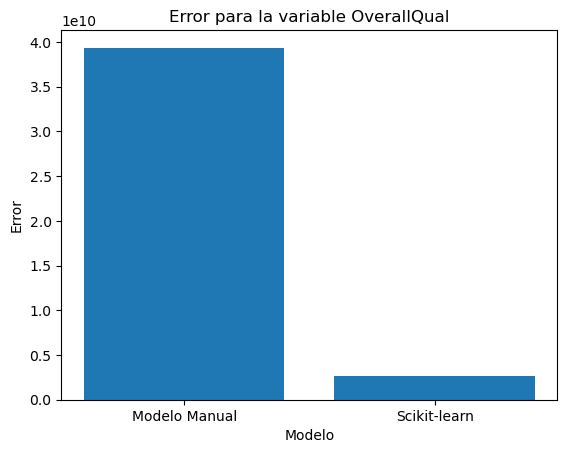


Iteración 10: Error = 4094771266.312577
Iteración 20: Error = 4094530465.9718404
Iteración 30: Error = 4094530088.5630894
Iteración 40: Error = 4094529711.5987916
Iteración 50: Error = 4094529334.6352353
Iteración 60: Error = 4094528957.6724234
Iteración 70: Error = 4094528580.710353
Iteración 80: Error = 4094528203.749026
Iteración 90: Error = 4094527826.78844
Iteración 100: Error = 4094527449.828598
Para la variable FstFlrSF:
Error del modelo manual: 4240572643.6220684
Error del modelo de scikit-learn: 4383846078.680038
Error del modelo combinado: 4261881600.5246973
Conclusión: El modelo manual es el mejor.


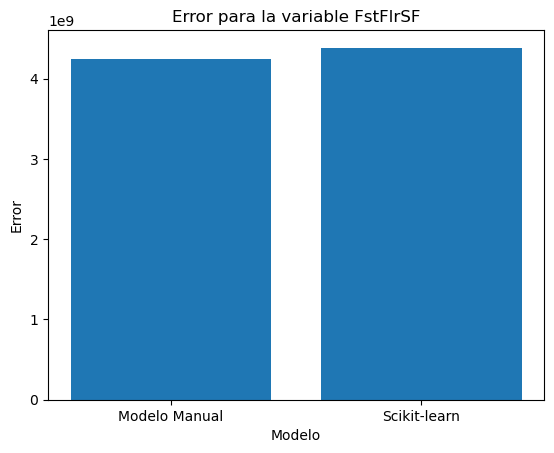


Iteración 10: Error = 38856623836.667305
Iteración 20: Error = 38824474894.423256
Iteración 30: Error = 38792355914.66108
Iteración 40: Error = 38760266869.45606
Iteración 50: Error = 38728207730.909485
Iteración 60: Error = 38696178471.14864
Iteración 70: Error = 38664179062.32681
Iteración 80: Error = 38632209476.62319
Iteración 90: Error = 38600269686.242966
Iteración 100: Error = 38568359663.41715
Para la variable TotRmsAbvGrd:
Error del modelo manual: 39343090266.204994
Error del modelo de scikit-learn: 5176521056.58883
Error del modelo combinado: 14178802094.340988
Conclusión: El modelo de scikit-learn es el mejor.


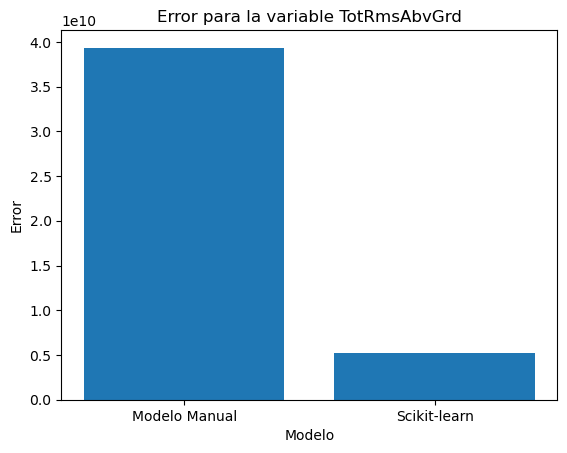


Iteración 10: Error = 6.378406159803796e+18
Iteración 20: Error = 1.0222962661572982e+28
Iteración 30: Error = 1.6384808846555995e+37
Iteración 40: Error = 2.6260680961625486e+46
Iteración 50: Error = 4.208919194765248e+55
Iteración 60: Error = 6.745826893807433e+64
Iteración 70: Error = 1.0811844650715366e+74
Iteración 80: Error = 1.7328636887867242e+83
Iteración 90: Error = 2.7773397240932394e+92
Iteración 100: Error = 4.4513691370768095e+101
Para la variable YearBuilt:
Error del modelo manual: 3.7121803196235685e+102
Error del modelo de scikit-learn: 5447834477.467489
Error del modelo combinado: 9.280450799058921e+101
Conclusión: El modelo de scikit-learn es el mejor.


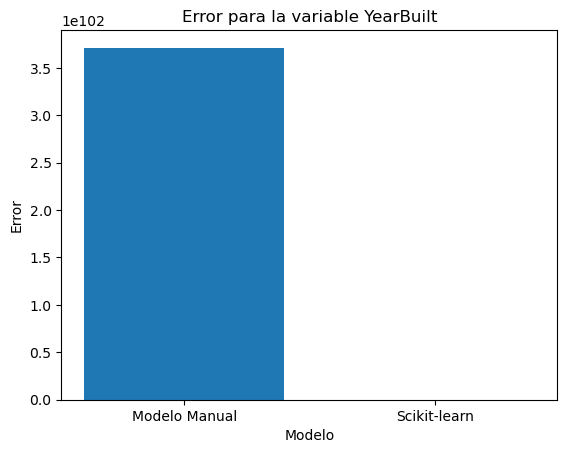


Iteración 10: Error = 35862010470.908394
Iteración 20: Error = 32831712158.133186
Iteración 30: Error = 30113442215.990482
Iteración 40: Error = 27675071211.39571
Iteración 50: Error = 25487778065.784283
Iteración 60: Error = 23525709395.206367
Iteración 70: Error = 21765673928.032085
Iteración 80: Error = 20186868388.34003
Iteración 90: Error = 18770631604.980564
Iteración 100: Error = 17500223939.927868
Para la variable LotFrontage:
Error del modelo manual: 18227310340.87736
Error del modelo de scikit-learn: 6510307747.730057
Error del modelo combinado: 9372557187.113474
Conclusión: El modelo de scikit-learn es el mejor.


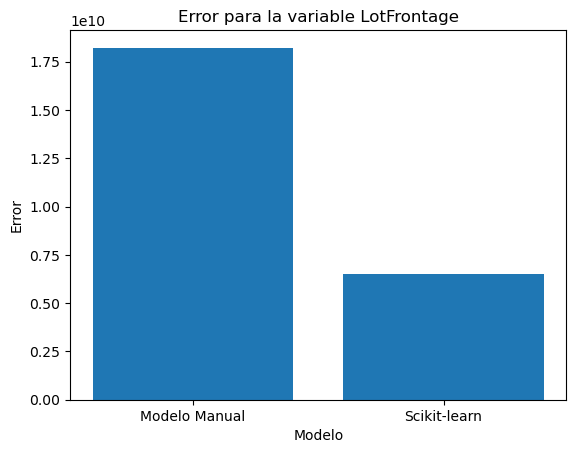

In [129]:
#Entrenamiento de modelo y evaluación para cada variable x

variables_x = ['OverallQual', 'FstFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']

for x in variables_x:
    x_train = df_tr[x].values
    y_train = df_tr['SalePrice'].values  
    x_val = df_val[x].values
    y_val = df_val['SalePrice'].values
    
    y_pred_manual = train_manual_model(x_train, y_train, x_val, y_val, epochs=100, print_error_each=10, alpha=0.000001)
    y_pred_sklearn = train_sklearn_model(x_train, y_train, x_val)
    y_pred_combined = combine_predictions(y_pred_manual, y_pred_sklearn)

    error_manual = calculate_error(y_val, y_pred_manual)
    error_sklearn = calculate_error(y_val, y_pred_sklearn)
    error_combined = calculate_error(y_val, y_pred_combined)
        
    print(f"Para la variable {x}:")
    print(f"Error del modelo manual: {error_manual}")
    print(f"Error del modelo de scikit-learn: {error_sklearn}")
    print(f"Error del modelo combinado: {error_combined}")
    if error_manual < error_sklearn and error_manual < error_combined:
        print("Conclusión: El modelo manual es el mejor.")
    elif error_sklearn < error_manual and error_sklearn < error_combined:
        print("Conclusión: El modelo de scikit-learn es el mejor.")
    else:
        print("Conclusión: El modelo combinado es el mejor.")
    
    plot_model_error(x, y_val, y_pred_manual, y_pred_sklearn)
    print()